In [1]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import seaborn as sns

# Add 'src' to the system path
sys.path.append(str(Path().resolve() / 'src'))
from src.utils.plot_utils import *
from src.models.empath_model import *
import json

[nltk_data] Downloading package stopwords to /Users/chsce/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TDMB

## Production types

In [108]:
prod_type_proportions = pd.read_csv('./data/website_data/TMDB/prod_type_proportions.csv')
prod_type_proportions['dvd_era'] = pd.Categorical(prod_type_proportions['dvd_era'], categories=['pre', 'during', 'post'], ordered=True)
prod_type_proportions['prod_type'] = pd.Categorical(prod_type_proportions['prod_type'], categories=['Independent', 'Small', 'Big', 'Super'], ordered=True)

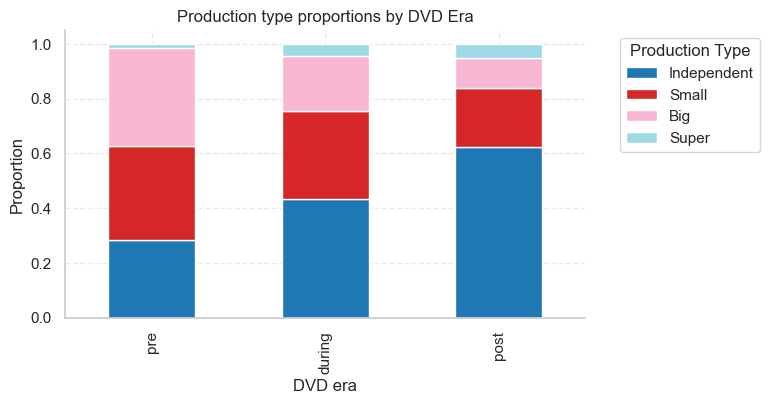

In [109]:
prod_type_proportions.pivot_table(index='dvd_era', columns='prod_type', values='prop', fill_value=0, observed=False).plot(kind='bar', stacked=True, figsize=(8, 4), colormap='tab20')
plt.legend(title="Production Type", bbox_to_anchor=(1.35, 1), loc='upper right')
plt.tight_layout()
style_plot("Production type proportions by DVD Era", "DVD era", "Proportion")

## Genres and Topics analysis

In [110]:
genre_proportions = pd.read_csv('data/website_data/TMDB/genre_proportions.csv')

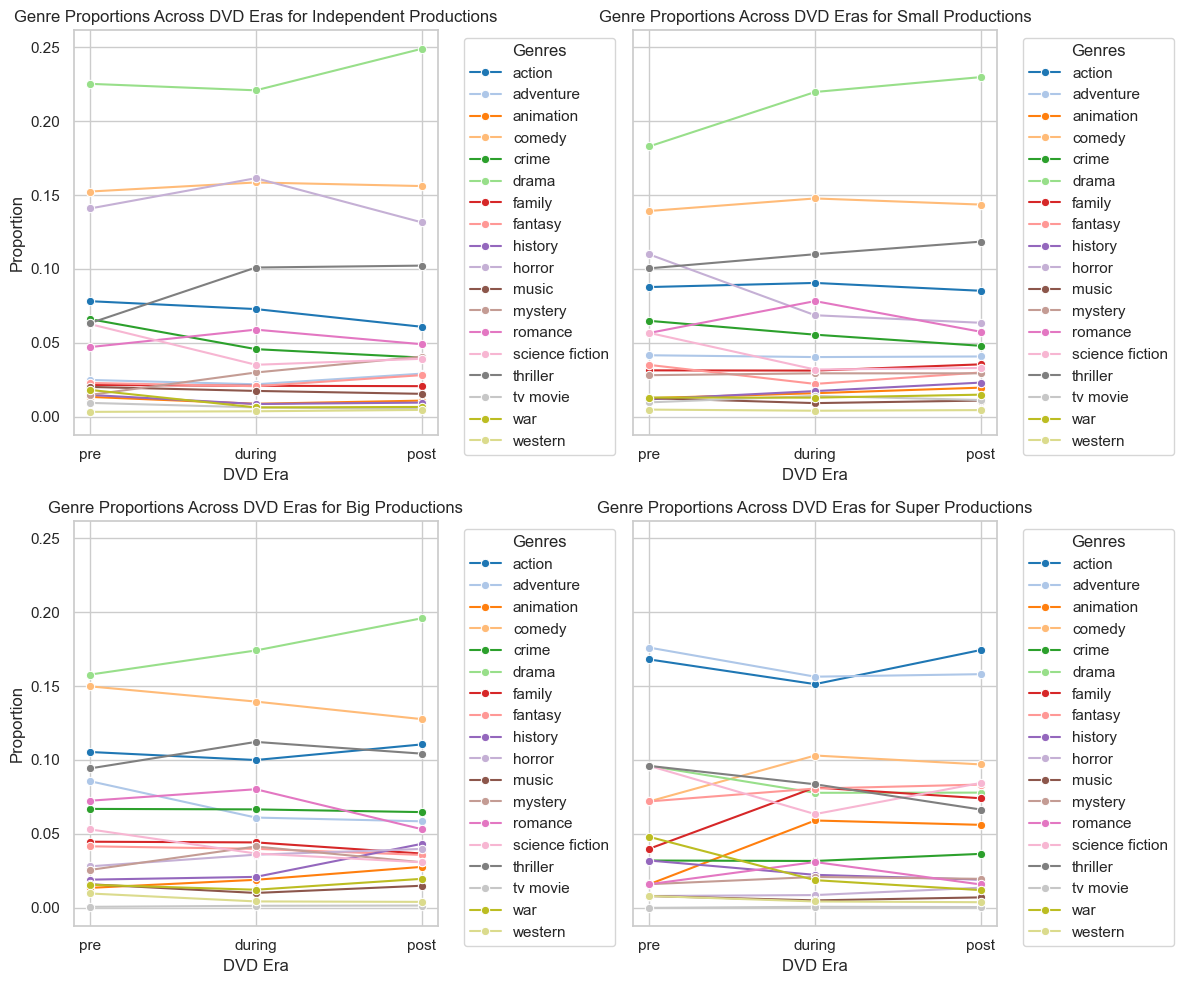

In [111]:
sns.set(style="whitegrid")
f, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
# Loop through each production type
for i, prod_type in enumerate(genre_proportions['prod_type'].unique()):
    subset = genre_proportions[genre_proportions['prod_type'] == prod_type]

    ax = axs.flatten()[i]
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, palette='tab20')
    ax.set_title(f"Genre Proportions Across DVD Eras for {prod_type} Productions")
    ax.set_xlabel('DVD Era')
    ax.set_ylabel('Proportion')
    
    ax.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

plt.show()

In [112]:
grouped_genres = genre_proportions.groupby(['prod_type', 'genres'], observed=False).sum('count').reset_index()
grouped_genres['proportion'] = grouped_genres['count'] / grouped_genres['total']

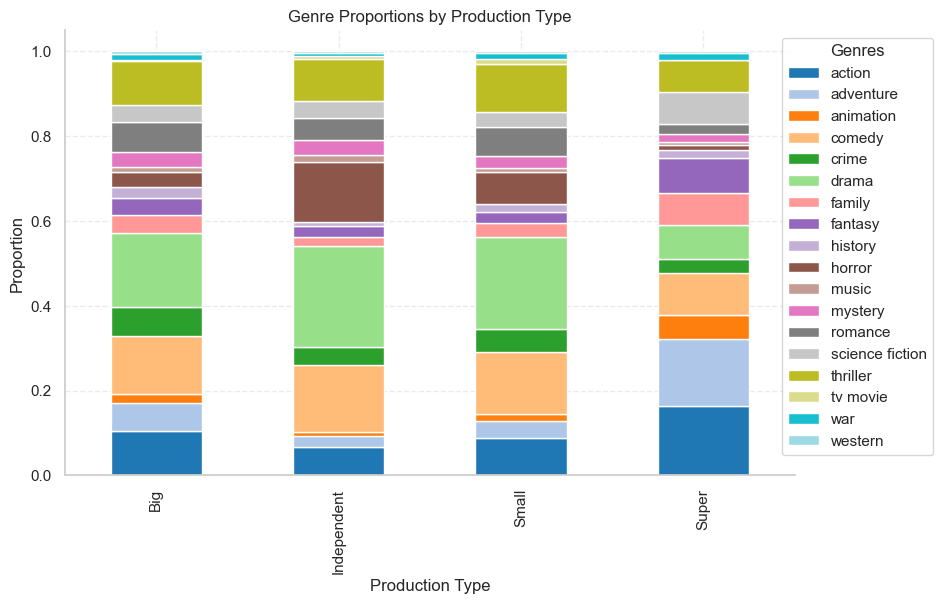

In [113]:
grouped_genres.pivot_table(index='prod_type', columns='genres', values='proportion', fill_value=0, observed=False).plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.2, 1), loc='upper right')
style_plot("Genre Proportions by Production Type", "Production Type", "Proportion")

### Topics extraction

In [10]:
results = pd.read_csv('./data/website_data/TMDB/topics_per_genre_prod.csv')
results['era'] = pd.Categorical(results['era'], categories=['pre', 'during', 'post'], ordered=True)

In [39]:
import ipywidgets as widgets
from ipywidgets import interact
%run src/models/empath_model.py
def dynamic_feature_plot(fixed_value):
    empathModel = EmpathModel()
    empathModel.plot_all_features(results, fixed_value)

# Create widgets for selection
prod_type_selector = widgets.Dropdown(
    options=results['genre'].unique(),
    description='Genre:'
)

interact(dynamic_feature_plot, fixed_value=prod_type_selector)
plt.show()

interactive(children=(Dropdown(description='Genre:', options=('drama', 'comedy', 'action', 'adventure'), value…

## Production countries

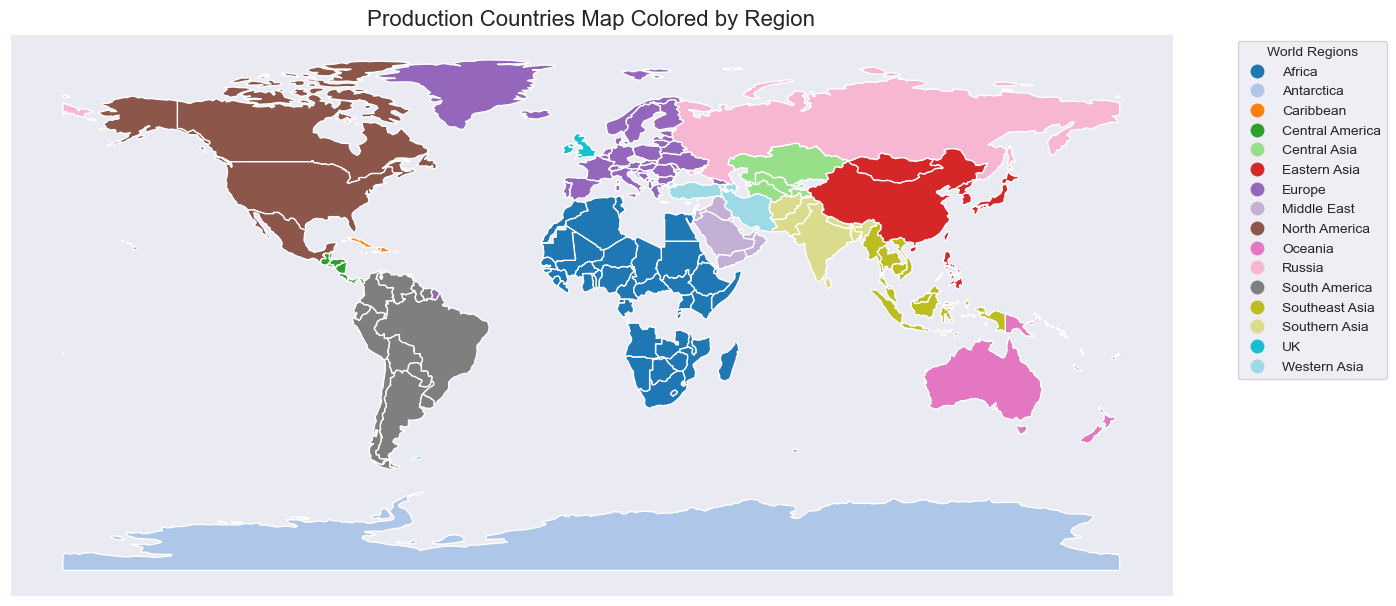

In [2]:
with open('./data/countries_to_region.json', 'r') as file:
    countries_regions = json.loads(file.read())
    
plot_world_map(countries_regions)

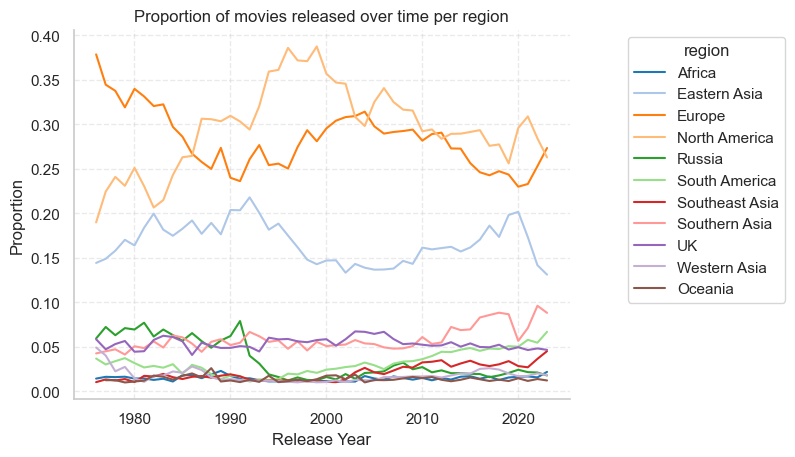

In [120]:
region_props = pd.read_csv('./data/website_data/TMDB/region_props.csv')

f = sns.lineplot(data=region_props[region_props.prop > 0.01], x='release_year', y='prop', hue='region', palette='tab20')
sns.move_legend(f, loc='upper right', bbox_to_anchor=(1.45, 1))
style_plot('Proportion of movies released over time per region', 'Release Year', 'Proportion')
plt.show()

In [121]:
selected_regions = list(region_props[region_props.prop > 0.05].region.unique())

In [122]:
region_prod_props = pd.read_csv('./data/website_data/TMDB/region_prod_type_props.csv')
region_prod_props['dvd_era'] = pd.Categorical(region_prod_props['dvd_era'], categories=['pre', 'during', 'post'], ordered=True)
region_prod_props['prod_type'] = pd.Categorical(region_prod_props['prod_type'], categories=['Independent', 'Small', 'Big', 'Super'], ordered=True)

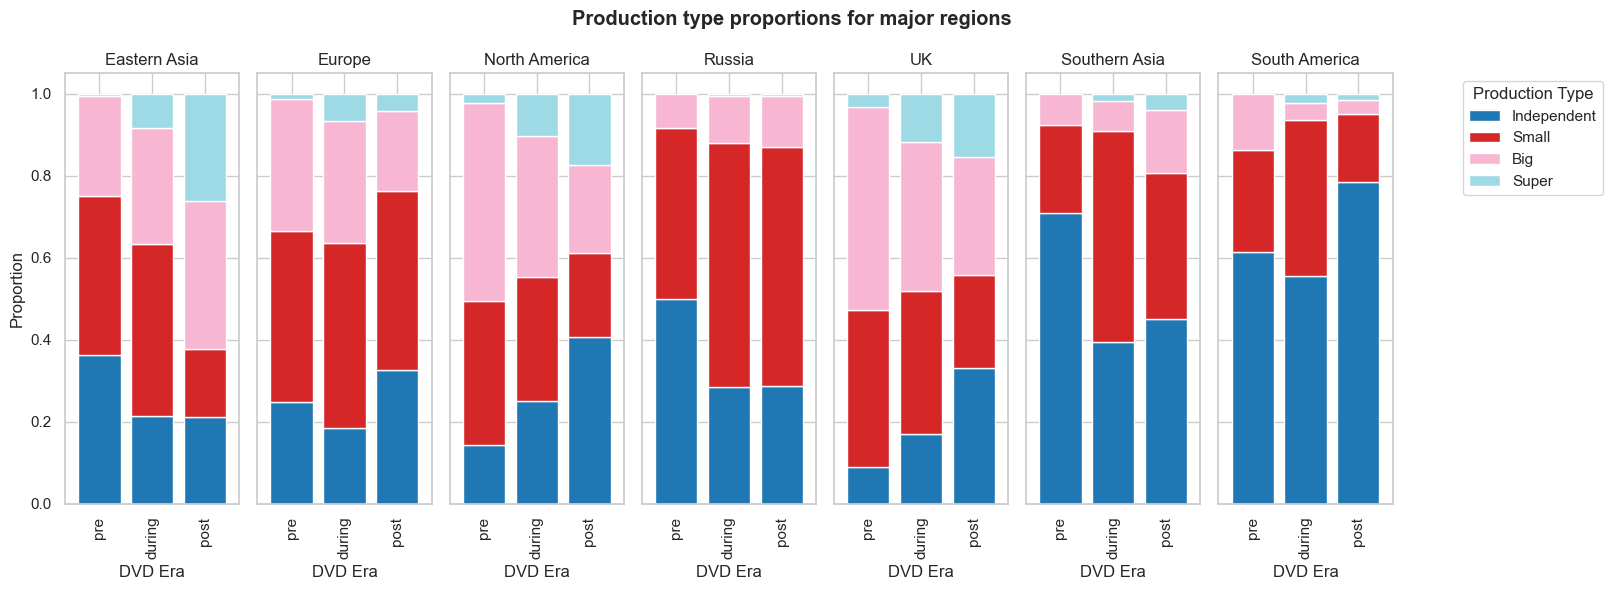

In [123]:
f, axs = plt.subplots(1, len(selected_regions), figsize=(16, 6), sharey=True)

for i, region in enumerate(selected_regions):
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else True
    
    (region_prod_props[region_prod_props.region == region].
     pivot_table(index='dvd_era', columns='prod_type', values='prop', fill_value=0, observed=False)[['Independent', 'Small', 'Big', 'Super']].
     plot(kind='bar', stacked=True, colormap='tab20', ax=ax, legend=legend, width=0.8))
    ax.set_title(region)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
sns.move_legend(axs[len(selected_regions)-1], loc='upper right', bbox_to_anchor=(2.25,1),title='Production Type')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()

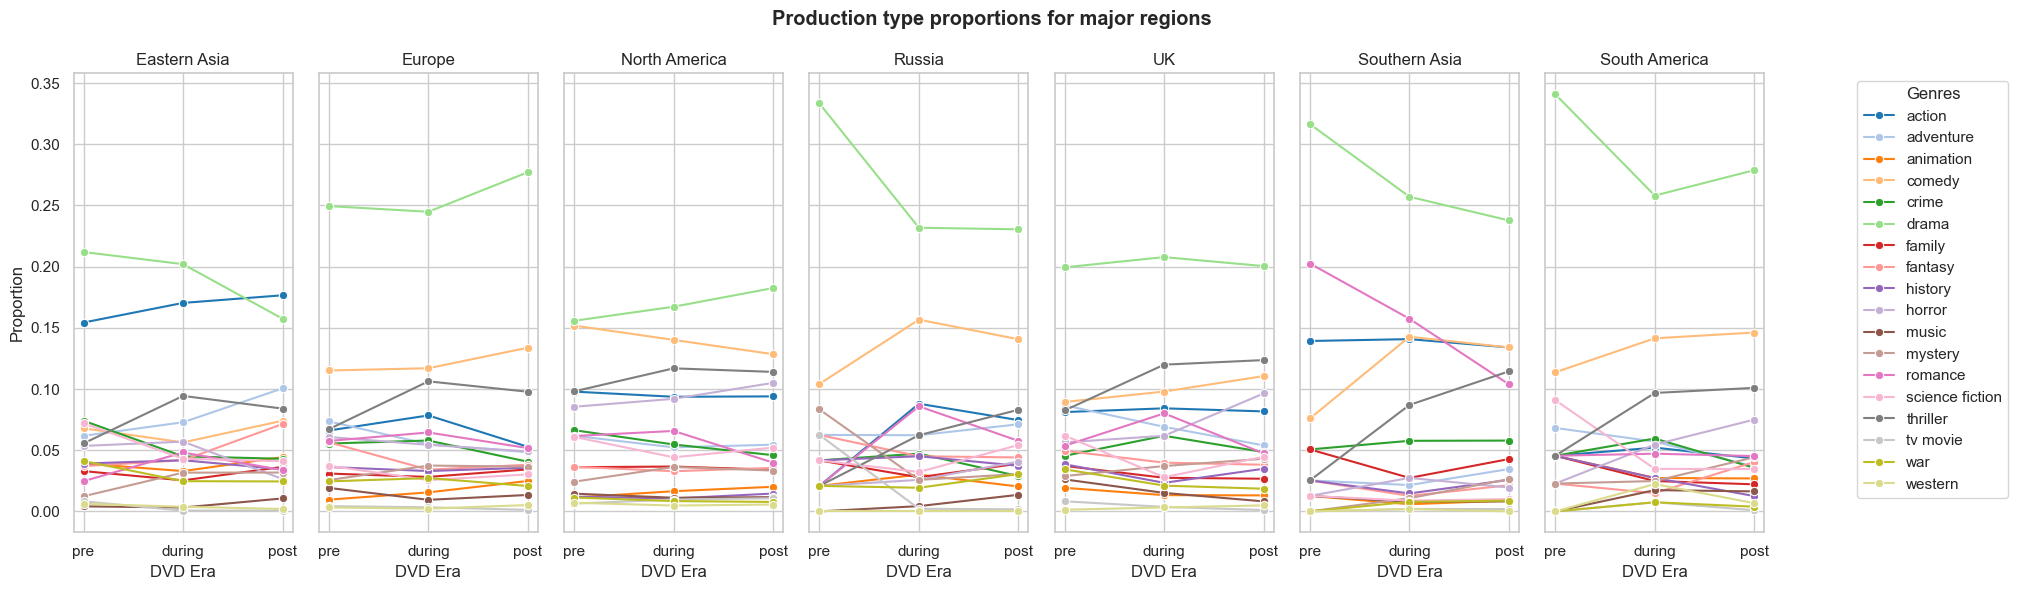

In [125]:
countries_genres_props = pd.read_csv('./data/website_data/TMDB/region_genres_props.csv')
countries_genres_props['dvd_era'] = pd.Categorical(countries_genres_props['dvd_era'],categories=['pre', 'during', 'post'], ordered=True)
sns.set(style="whitegrid")
f, axs = plt.subplots(1, len(selected_regions), figsize=(20, 6), sharey=True)
for i, region in enumerate(selected_regions):
    subset = countries_genres_props[countries_genres_props['region'] == region]
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else 'full'
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, legend=legend, palette='tab20')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
    ax.set_title(region)
        
sns.move_legend(axs[len(selected_regions)-1], loc='upper right', bbox_to_anchor=(2.15,1),title='Genres')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()

# CMU
## Production Types


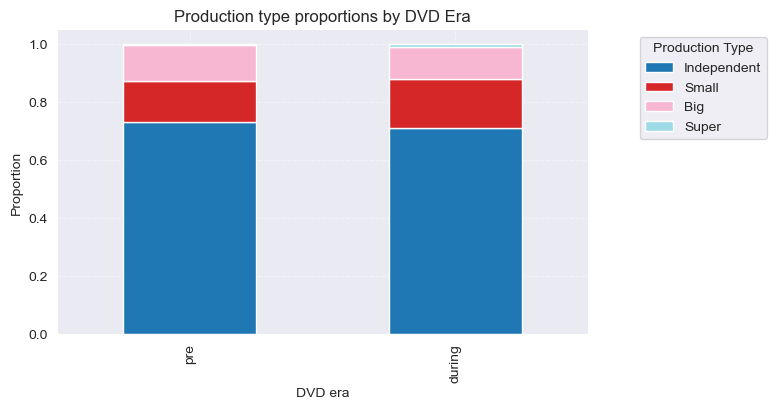

In [3]:
prod_type_proportions = pd.read_csv('./data/website_data/CMU/prod_type_proportions.csv')
prod_type_proportions['dvd_era'] = pd.Categorical(prod_type_proportions['dvd_era'],
                                                  categories=['pre', 'during'], ordered=True)
prod_type_proportions['prod_type'] = pd.Categorical(prod_type_proportions['prod_type'],
                                                    categories=['Independent', 'Small', 'Big', 'Super'], ordered=True)
prod_type_proportions.pivot_table(index='dvd_era', columns='prod_type', values='prop', fill_value=0,
                                  observed=False).plot(kind='bar', stacked=True, figsize=(8, 4), colormap='tab20')
plt.legend(title="Production Type", bbox_to_anchor=(1.35, 1), loc='upper right')
plt.tight_layout()
style_plot("Production type proportions by DVD Era", "DVD era", "Proportion")

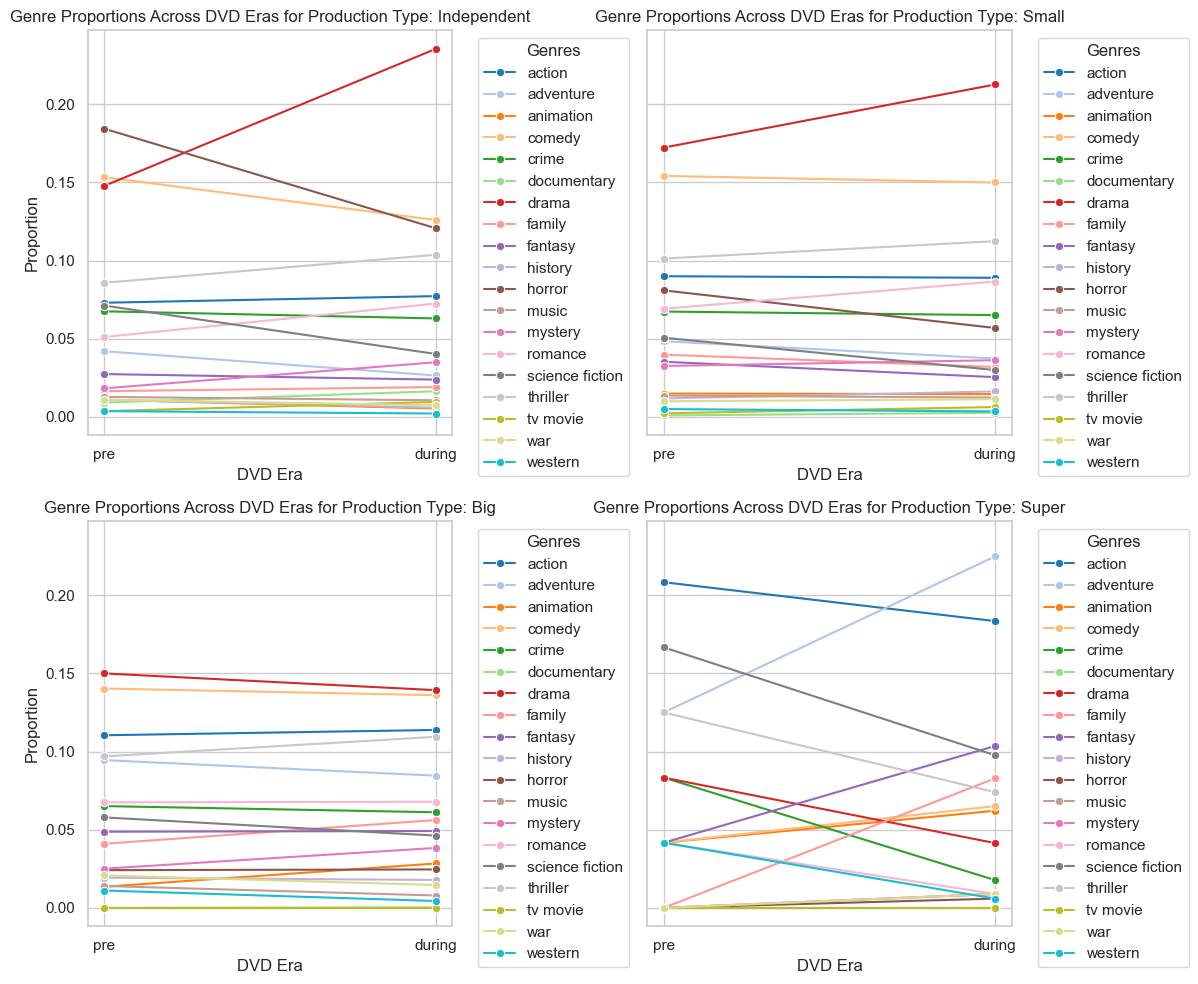

In [4]:
genre_proportions = pd.read_csv('data/website_data/CMU/genre_proportions.csv')
sns.set(style="whitegrid")
f, axs = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
# Loop through each production type
for i, prod_type in enumerate(genre_proportions['prod_type'].unique()):
    subset = genre_proportions[genre_proportions['prod_type'] == prod_type]

    ax = axs.flatten()[i]
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, palette='tab20')
    ax.set_title(f"Genre Proportions Across DVD Eras for Production Type: {prod_type}")
    ax.set_xlabel('DVD Era')
    ax.set_ylabel('Proportion')

    ax.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

plt.show()

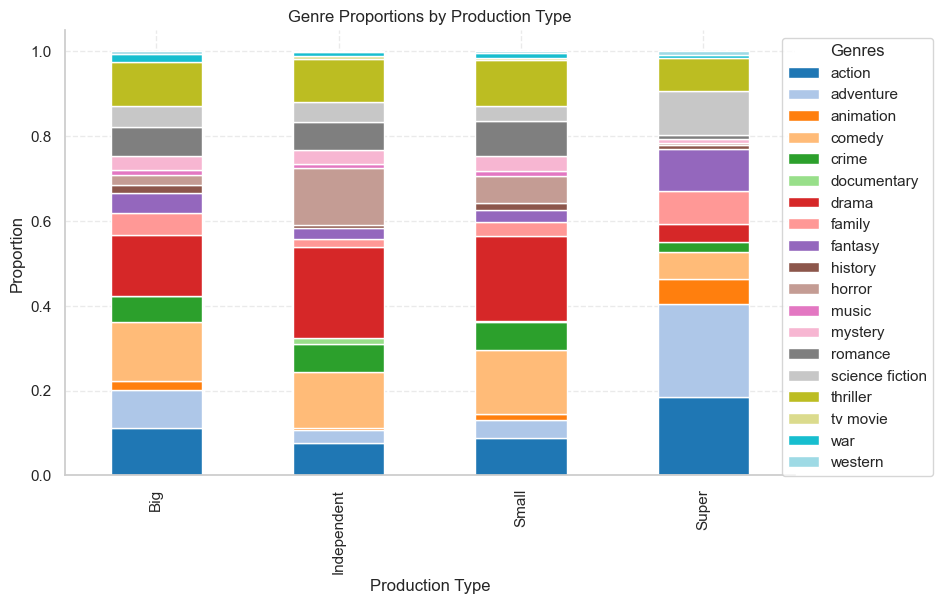

In [5]:
grouped_genres = genre_proportions.groupby(['prod_type', 'genres'], observed=False).sum('count').reset_index()
grouped_genres['proportion'] = grouped_genres['count'] / grouped_genres['total']
# Pivot the DataFrame
pivot_df = grouped_genres.pivot_table(index='prod_type', columns='genres', values='proportion', fill_value=0,
                                      observed=False)

pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20')
plt.tight_layout()
plt.legend(title="Genres", bbox_to_anchor=(1.2, 1), loc='upper right')
style_plot("Genre Proportions by Production Type", "Production Type", "Proportion")

In [9]:
import ipywidgets as widgets
from ipywidgets import interact

results = pd.read_csv('./data/website_data/CMU/topics_per_genre_prod.csv')
results['era'] = pd.Categorical(results['era'], categories=['pre', 'during'], ordered=True)

empathModel = EmpathModel()
def dynamic_feature_plot(fixed_value):
    empathModel.plot_all_features(results, fixed_value)

# Create widgets for selection
prod_type_selector = widgets.Dropdown(
    options=results['genre'].unique(),
    description='Genre:'
)

interact(dynamic_feature_plot, fixed_value=prod_type_selector)
plt.show()

interactive(children=(Dropdown(description='Genre:', options=('drama', 'comedy', 'action', 'adventure'), value…

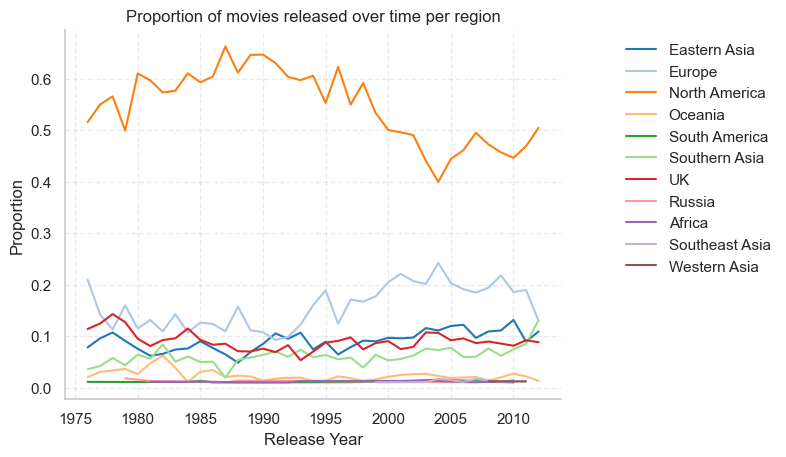

In [6]:
region_props = pd.read_csv('./data/website_data/CMU/region_props.csv')

sns.lineplot(data=region_props[region_props.prop > 0.01], x='release_year', y='prop', hue='region', palette='tab20')
plt.legend(loc='upper right', bbox_to_anchor=(1.45, 1), frameon=False)
style_plot('Proportion of movies released over time per region', 'Release Year', 'Proportion')
plt.show()

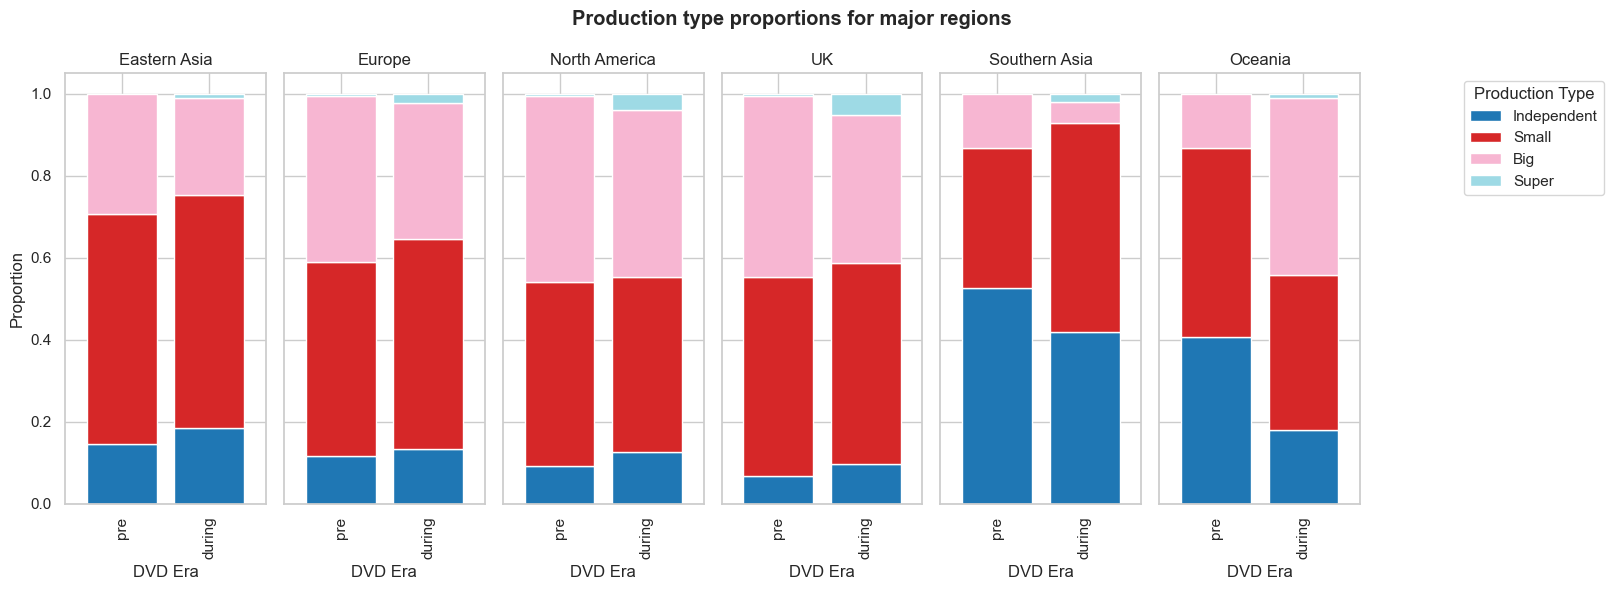

In [8]:
region_prod_props = pd.read_csv('./data/website_data/CMU/region_prod_type_props.csv')
region_prod_props['dvd_era'] = pd.Categorical(region_prod_props['dvd_era'], categories=['pre', 'during'],
                                              ordered=True)
region_prod_props['prod_type'] = pd.Categorical(region_prod_props['prod_type'],
                                                categories=['Independent', 'Small', 'Big', 'Super'], ordered=True)

selected_regions = list(region_props[region_props.prop > 0.05].region.unique())

f, axs = plt.subplots(1, len(selected_regions), figsize=(16, 6), sharey=True)

for i, region in enumerate(selected_regions):
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else True

    (region_prod_props[region_prod_props.region == region].
     pivot_table(index='dvd_era', columns='prod_type', values='prop', fill_value=0, observed=False)[
         ['Independent', 'Small', 'Big', 'Super']].
     plot(kind='bar', stacked=True, colormap='tab20', ax=ax, legend=legend, width=0.8))
    ax.set_title(region)
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
sns.move_legend(axs[len(selected_regions) - 1], loc='upper right', bbox_to_anchor=(2.25, 1), title='Production Type')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()

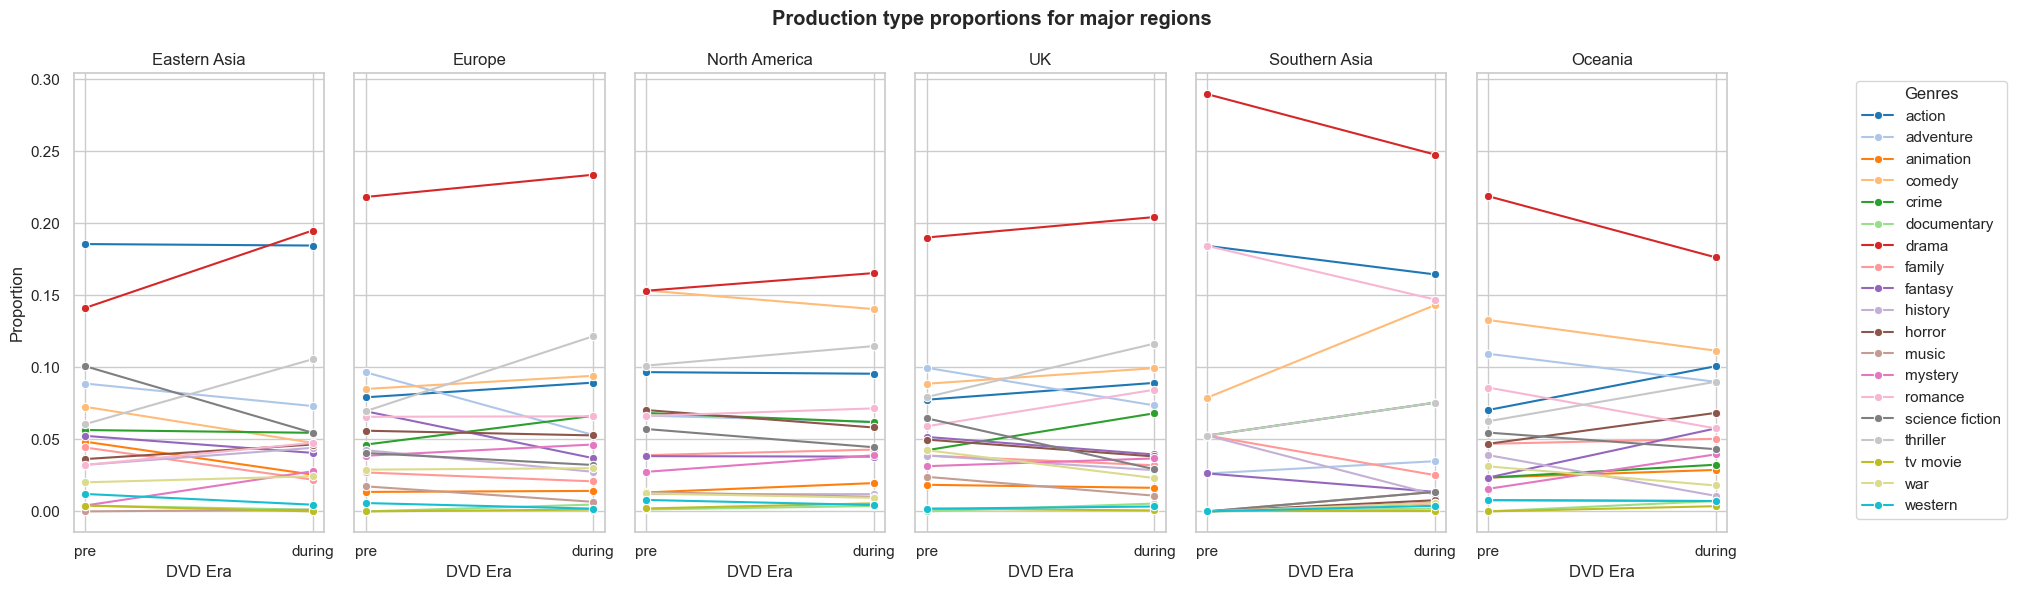

In [40]:
countries_genres_props = pd.read_csv('./data/website_data/CMU/region_genres_props.csv')
countries_genres_props['dvd_era'] = pd.Categorical(countries_genres_props['dvd_era'],categories=['pre', 'during', 'post'], ordered=True)
sns.set(style="whitegrid")
f, axs = plt.subplots(1, len(selected_regions), figsize=(20, 6), sharey=True)
for i, region in enumerate(selected_regions):
    subset = countries_genres_props[countries_genres_props['region'] == region]
    ax = axs[i]
    legend = False if (i < len(selected_regions) - 1) else 'full'
    sns.lineplot(data=subset, x='dvd_era', y='prop', hue='genres', marker='o', ax=ax, legend=legend, palette='tab20')
    ax.set_ylabel('Proportion')
    ax.set_xlabel('DVD Era')
    ax.set_title(region)
        
sns.move_legend(axs[len(selected_regions)-1], loc='upper right', bbox_to_anchor=(2.15,1),title='Genres')
f.suptitle('Production type proportions for major regions', fontweight='bold')
plt.tight_layout()
plt.show()